In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

In [60]:
df=pd.read_csv("/home/sid/Documents/credit1.csv");

In [61]:
X=df.drop(['Class'],1)
y=df['Class']

In [62]:
trainX,testX,trainY,testY=train_test_split(X,y,test_size=0.2)

In [63]:
trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

In [64]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
Xoversampled, Yoversampled = ada.fit_resample(trainX, trainY)

In [65]:
from xgboost import XGBClassifier
my_model = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              eval_metric=['error', 'auc'], gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=23, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=28, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [66]:
result_xgb1 = my_model.predict(testX)

In [67]:
accuracy_score(testY,result_xgb1)

0.9995611109160493

In [68]:
roc_auc_score(result_xgb1,testY)

0.97628597934242

In [69]:
f1_score(testY,result_xgb1,average='weighted')

0.9995411942120893

In [70]:
confusion_matrix(result_xgb1,testY)

array([[56856,    21],
       [    4,    81]])

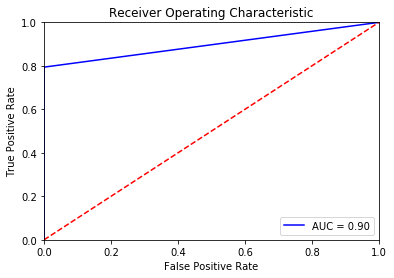

In [71]:
import sklearn.metrics as metrics
preds = result_xgb1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
my_model2 = XGBClassifier(
    colsample_bytree=0.7, subsample=0.7, max_depth=23, n_estimators=150, n_jobs=28, eval_metric=[ "error","auc"])
my_model2.fit(Xoversampled, Yoversampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              eval_metric=['error', 'auc'], gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=23, min_child_weight=1, missing=None,
              n_estimators=150, n_jobs=28, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [73]:
result_xgb2 = my_model2.predict(testX)

In [74]:
accuracy_score(testY,result_xgb2)

0.9994733330992591

In [75]:
roc_auc_score(result_xgb2,testY)

0.9298593085012837

In [76]:
f1_score(testY,result_xgb2,average='weighted')

0.9994707304685531

In [77]:
confusion_matrix(testY,result_xgb2)

array([[56846,    14],
       [   16,    86]])

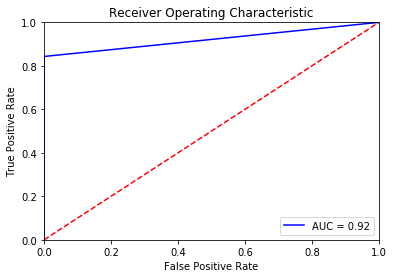

In [78]:
import sklearn.metrics as metrics
preds = result_xgb2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [81]:
clf.fit(trainX,trainY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [82]:
result_ada1=clf.predict(testX)

In [83]:
accuracy_score(result_ada1,testY)

0.9993328885923949

In [84]:
roc_auc_score(result_ada1,testY)

0.9275579859645833

In [85]:
f1_score(testY,result_ada1,average='weighted')

0.9993120765547703

In [86]:
confusion_matrix(testY,result_ada1)

array([[56847,    13],
       [   25,    77]])

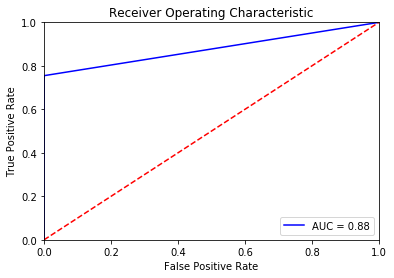

In [87]:
import sklearn.metrics as metrics
preds = result_ada1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
clf2 = AdaBoostClassifier(n_estimators=100, random_state=0)

In [89]:
clf2.fit(Xoversampled,Yoversampled)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [90]:
result_ada2=clf2.predict(testX)

In [91]:
accuracy_score(result_ada2,testY)

0.9924159966293319

In [92]:
roc_auc_score(result_ada2,testY)

0.5900365568573874

In [93]:
f1_score(testY,result_ada2,average='weighted')

0.9949424143023321

In [94]:
confusion_matrix(testY,result_ada2)

array([[56437,   423],
       [    9,    93]])

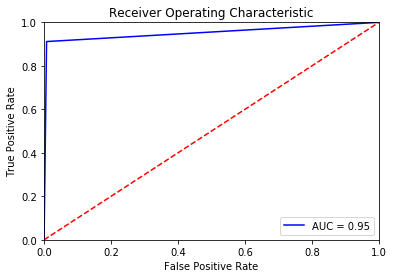

In [95]:
import sklearn.metrics as metrics
preds = result_ada2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [97]:
vclf1 = LogisticRegression(random_state=1)
vclf2 = RandomForestClassifier(n_estimators=50, random_state=1)
vclf3 = GaussianNB()

In [98]:
c=[vclf1,vclf2,vclf3]

In [99]:
for i in c:
    i.fit(trainX,trainY)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
x=len(c)
y=len(testY)
z=np.zeros((x,y))

In [101]:
for i in range(len(c)):
    z[i]=c[i].predict(testX)

In [102]:
result_vot1=np.zeros(y)
for i in range(y):
    count1=0
    for j in range(x):
        if(z[j][i]==1):
            count1=count1+1
    if(count1>1):
        result_vot1[i]=1
    else:
        result_vot1[i]=0

In [103]:
accuracy_score(result_vot1,testY)

0.9991222218320986

In [104]:
roc_auc_score(result_vot1,testY)

0.9353539538574341

In [105]:
f1_score(testY,result_vot1,average='weighted')

0.9990406915145655

In [106]:
confusion_matrix(result_vot1,testY)

array([[56851,    41],
       [    9,    61]])

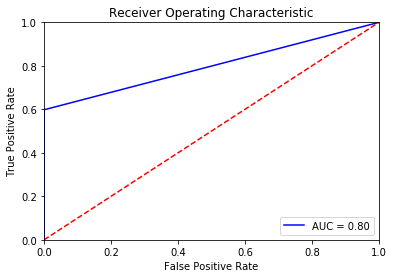

In [107]:
import sklearn.metrics as metrics
preds = result_vot1
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
for i in c:
    i.fit(Xoversampled,Yoversampled)

/home/sid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
x=len(c)
y=len(testY)
z=np.zeros((x,y))

In [110]:
for i in range(len(c)):
    z[i]=c[i].predict(testX)

In [111]:
result_vot2=np.zeros(y)
for i in range(y):
    count1=0
    for j in range(x):
        if(z[j][i]==1):
            count1=count1+1
    if(count1>1):
        result_vot2[i]=1
    else:
        result_vot2[i]=0

In [112]:
accuracy_score(result_vot2,testY)

0.9983848881710614

In [113]:
roc_auc_score(result_vot2,testY)

0.7652912536950096

In [114]:
f1_score(testY,result_vot2,average='weighted')

0.9985679973053158

In [115]:
confusion_matrix(result_vot2,testY)

array([[56784,    16],
       [   76,    86]])

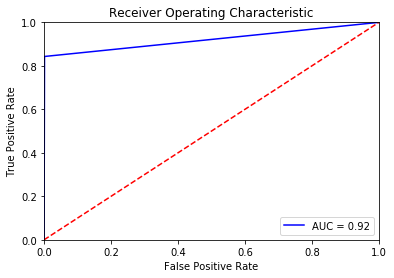

In [116]:
import sklearn.metrics as metrics
preds = result_vot2
fpr, tpr, threshold = metrics.roc_curve(testY, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()